<a href="https://colab.research.google.com/github/DDiekmann/zonotpy/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
%%capture

!wget --no-cache --backups=1 {'https://raw.githubusercontent.com/DDiekmann/zonotpy/main/src/interval_abstraction.py'}

!wget --no-cache --backups=1 {'https://raw.githubusercontent.com/DDiekmann/zonotpy/main/src/nn_functions.py'}

!wget --no-cache --backups=1 {'https://raw.githubusercontent.com/DDiekmann/zonotpy/main/src/zonotope.py'}

In [4]:
import interval_abstraction as interval
import nn_functions as zono_functions
import numpy as np

from zonotope import zono
from matplotlib import pyplot as plt

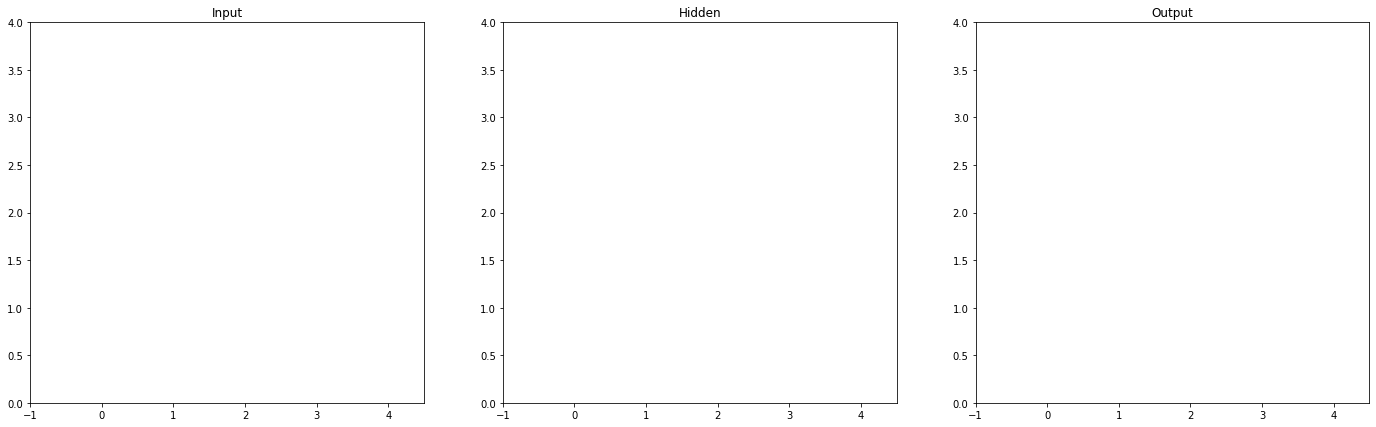

In [15]:
def create_plot():
  fig, ax = plt.subplots(1, 3)

  fig.set_size_inches(24, 7)

  ax[0].set_title("Input")
  ax[0].set_xlim(-1, 4.5)
  ax[0].set_ylim(0, 4)
  ax[1].set_title("Hidden")
  ax[1].set_xlim(-1, 4.5)
  ax[1].set_ylim(0, 4)
  ax[2].set_title("Output")
  ax[2].set_xlim(-1, 4.5)
  ax[2].set_ylim(0, 4)
  return fig, ax

In [31]:
network = {'v1': [0.2, 0.7], 'v2': [0.9, 0.45], 'o1': [0.4, 0.1], 'o2': [0.1, 0.2]}

In [29]:
def relu(x):
  if x > 0: return x
  return 0

def example_point(fig, ax, input = (1, 2)):
  ax[0].plot(input[0], input[1], 'ro')
  v1 = relu(network['v1'][0] * input[0] + network['v1'][1] * input[1])
  v2 = relu(network['v2'][0] * input[0] + network['v2'][1] * input[1])
  ax[1].plot(v1, v2, 'ro')
  o1 = relu(network['o1'][0] * v1 + network['o1'][1] * v2)
  o2 = relu(network['o2'][0] * v1 + network['o2'][1] * v2)
  ax[2].plot(o1, o2, 'ro')

[0.0, 0.0, 2.0, 2.0]
[0.7, 2.0999999999999996, 1.0999999999999999, 2.5]
[0.32500000000000007, 0.975, 0.6650000000000001, 1.315]


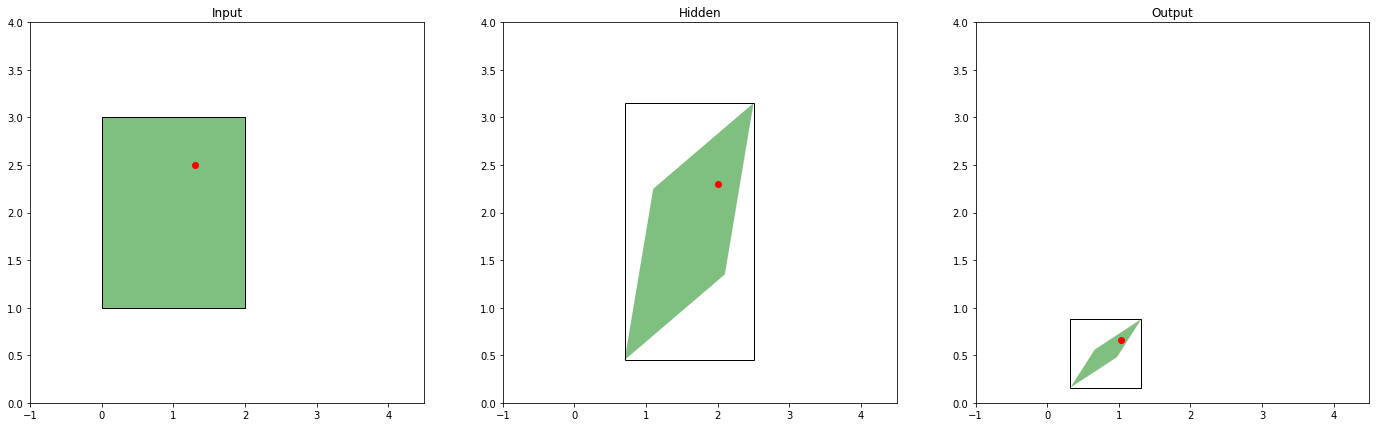

In [32]:
fig, ax = create_plot()

example_point(fig, ax, input=(1.3, 2.5))

input = zono(values = np.array([[1, 1, 0], [2, 0, 1]]))
input.visualize(shape=True, fig=fig, ax=ax[0])
i1, i2 = input.split()
v1 = zono_functions.relu(zono_functions.affine(network['v1'], i1, i2))
v2 = zono_functions.relu(zono_functions.affine(network['v2'], i1, i2))
hidden = v1.combine(v2)
hidden.visualize(shape=True, fig=fig, ax=ax[1])
o1 = zono_functions.relu(zono_functions.affine(network['o1'], v1, v2))
o2 = zono_functions.relu(zono_functions.affine(network['o2'], v1, v2))
output = o1.combine(o2)
output.visualize(shape=True, fig=fig, ax=ax[2])

i1 = (0, 2)
i2 = (1, 3)
interval.visualize(i1, i2, fig=fig, ax=ax[0])
v1 = interval.relu(interval.affine(network['v1'], i1, i2))
v2 = interval.relu(interval.affine(network['v2'], i1, i2))
interval.visualize(v1, v2, fig=fig, ax=ax[1])
o1 = interval.relu(interval.affine(network['o1'], v1, v2))
o2 = interval.relu(interval.affine(network['o2'], v1, v2))
interval.visualize(o1, o2, fig=fig, ax=ax[2])

plt.show()